<a href="https://colab.research.google.com/github/skywalker0803r/ruby_research/blob/main/crypto/5%E8%99%9F%E7%99%BC%E8%96%AA%E7%90%86%E8%AB%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# install

In [1]:
!pip install finlab_crypto > log.txt
!pip install pandas-ta > log.txt

# setting

In [2]:
from binance.client import Client
from tqdm import tqdm_notebook as tqdm
import binance
import finlab_crypto
import matplotlib.pyplot as plt
import seaborn as sb
from collections import Counter

api_key = 'aJOD1H8jl0396wDSo0k4PnZftjGWHQEDLoCh4T2OhbgljMBoAi8PTMRIPhsxHpDh'
api_secret = 'VpdtNdN9j1ZnTu55NzmVGeffam0yZzoGAEs83gLct5y0WnEDH2y7C2Ptkkv0cuj0'
freq = '1d'
nbars = 99999
client = Client(api_key,api_secret)

# main

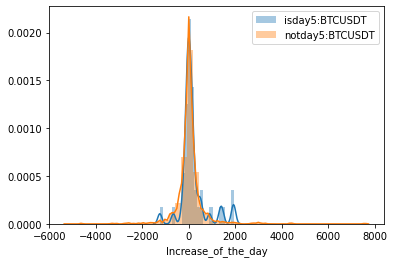

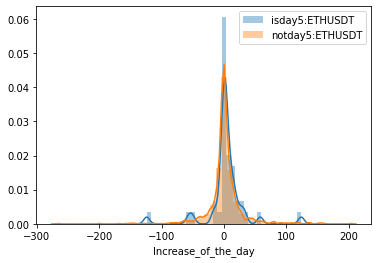

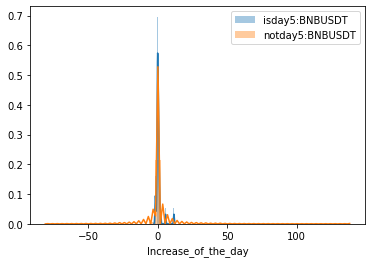

In [3]:
for pair in ['BTCUSDT','ETHUSDT','BNBUSDT']:
  try:
    ohlcv = finlab_crypto.crawler.get_nbars_binance(pair,freq,nbars,client)
    ohlcv['Increase_of_the_day'] = ohlcv['close'] - ohlcv['open']
    sb.distplot(ohlcv.loc[ohlcv.index.day == 5,'Increase_of_the_day'],label=f'isday5:{pair}')
    sb.distplot(ohlcv.loc[ohlcv.index.day != 5,'Increase_of_the_day'],label=f'notday5:{pair}')
    plt.legend()
    plt.show()
  except:
    pass

In [31]:
for pair in ['BTCUSDT','ETHUSDT','BNBUSDT']:
  ohlcv = finlab_crypto.crawler.get_nbars_binance(pair,freq,nbars,client)
  ohlcv['Increase_of_the_day'] = ohlcv['close'] - ohlcv['open']
  Increase_of_the_day = {}
  for i in range(1,32):
    Increase_of_the_day[i] = ohlcv.loc[ohlcv.index.day == i,'Increase_of_the_day'].mean()
  maximum = max(Increase_of_the_day.values()) 
  keys = [key for key, value in Increase_of_the_day.items() if value == maximum] 
  print(pair,'漲幅最大日',keys[0],'最大日漲幅平均',Increase_of_the_day[keys[0]])

BTCUSDT 漲幅最大日 5 最大日漲幅平均 185.08476190476173
ETHUSDT 漲幅最大日 3 最大日漲幅平均 13.810952380952374
BNBUSDT 漲幅最大日 19 最大日漲幅平均 3.466647499999999


In [26]:
import plotly.graph_objects as go

def plot_kline_with_day(day):
  ohlcv = finlab_crypto.crawler.get_nbars_binance('BTCUSDT',freq,nbars,client)
  ohlcv = ohlcv[['open','high','low','close','volume']]
  ohlcv = ohlcv.loc[ohlcv.index.day==day]
  fig = go.Figure(data=[go.Candlestick(x=ohlcv.index,
                open=ohlcv['open'],
                high=ohlcv['high'],
                low=ohlcv['low'],
                close=ohlcv['close'])])
  fig.update_layout({'title':f'day == {day}'})
  fig.show()

In [30]:
for i in range(1,11):
  plot_kline_with_day(i)